In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import pickle

In [2]:
# Load data
data = Path('Resource/sampled_rideshare_ver2.csv')
df = pd.read_csv(data)
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,day_of_week,is_weekend
0,ad4dc1c8-74e4-4018-aefe-be4e4b8e1ee5,1969-12-31 19:00:01.545085210-05:00,22,17,12,2018-12-17 22:20:10,America/New_York,northeastern university,theatre district,uber,...,34.25,1545044400,41.35,1545076800,28.40,1545044400,35.88,1545076800,1,False
1,47547461-f88b-4c14-9920-1d4a79e7025f,1969-12-31 19:00:01.543366102-05:00,0,28,11,2018-11-28 00:48:22,America/New_York,northeastern university,theatre district,lyft,...,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000,3,False
2,45fba16d-75f1-4e10-bbb7-614f7f1624ae,1969-12-31 19:00:01.543701476-05:00,21,1,12,2018-12-01 21:57:56,America/New_York,beacon hill,north end,uber,...,30.17,1543662000,44.11,1543690800,25.87,1543662000,43.44,1543690800,6,True
3,79ff5573-1bd4-406d-91c3-5e9b2b60d2b2,1969-12-31 19:00:01.544793612-05:00,13,14,12,2018-12-14 13:20:11,America/New_York,haymarket square,beacon hill,uber,...,27.18,1544781600,46.65,1544814000,24.51,1544785200,43.86,1544817600,5,False
4,80e33aa2-c291-41f0-b88d-adb3616bf154,1969-12-31 19:00:01.544851211-05:00,5,15,12,2018-12-15 05:20:11,America/New_York,north end,west end,lyft,...,39.54,1544929200,54.47,1544896800,36.46,1544929200,53.80,1544896800,6,True


In [3]:
# Features and target
features = ['hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name', 'temperature', 
            'distance', 'surge_multiplier', 'is_weekend']
target = 'price'

X = df[features]
y = df[target]

In [4]:
# Categorical and Numerical Columns
categorical_columns = ['name', 'source', 'destination', 'cab_type', 'is_weekend']
numerical_columns = ['hour', 'day', 'month', 'temperature', 'distance', 'surge_multiplier']


In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Define preprocessing for numerical data (including scaling)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numerical values
    ('scaler', StandardScaler())  # Scaling numerical features
])

# Define preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categorical values
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding for categorical columns
])

# Combine the transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),  # Preprocessing for numerical columns
        ('cat', categorical_transformer, categorical_columns)  # Preprocessing for categorical columns
    ], 
    remainder='drop' 
)

# Create a pipeline with preprocessing and the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, max_depth = 10, n_jobs=-1))
])

# Train the model pipeline
model_pipeline.fit(X_train, y_train)

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name:<25} | R²: {r2:.3f} | RMSE: {rmse:.3f} | MAE: {mae:.3f}")

# Call evaluation function correctly
evaluate_model("RandomForest", model_pipeline, X_test, y_test)

RandomForest              | R²: 0.954 | RMSE: 1.936 | MAE: 1.244


In [14]:
print("Target min:", y.min())
print("Target max:", y.max())


Target min: 2.5
Target max: 92.0


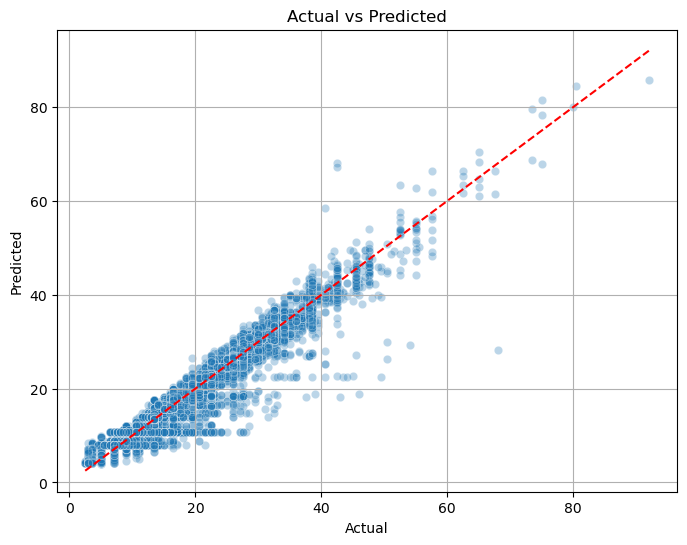

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

C:\Users\vsanh\AppData\Local\Temp\ipykernel_34360\3004615861.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')


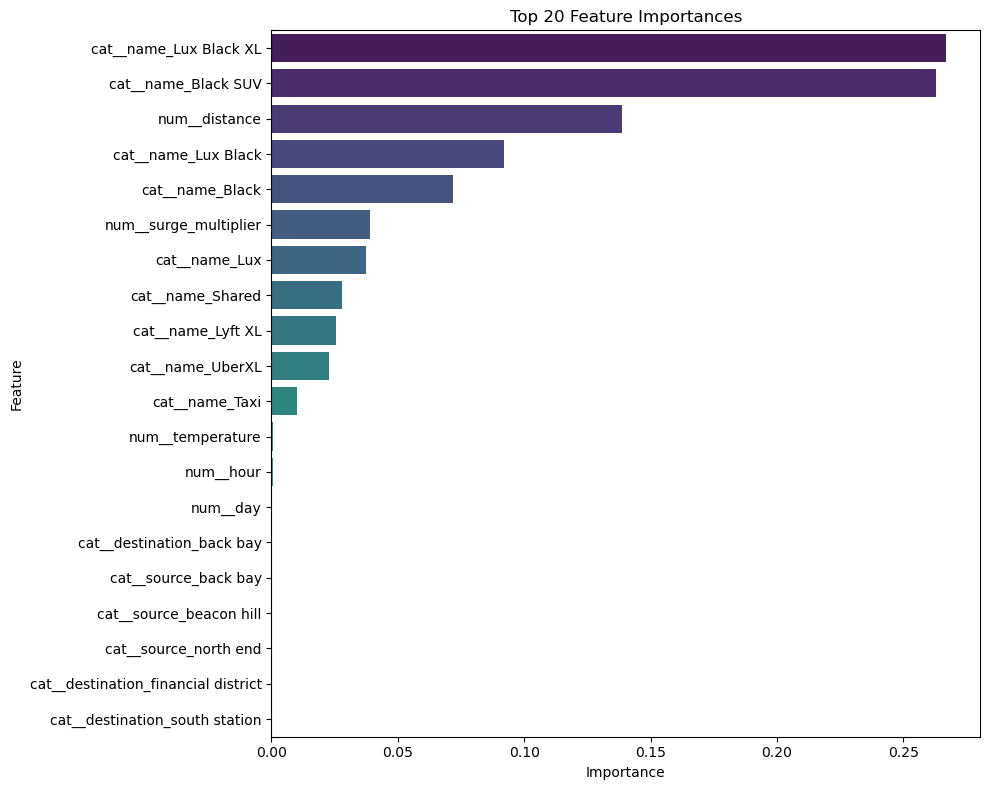

In [19]:
# Get feature names after preprocessing
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Get feature importances from the RandomForest regressor
importances = model_pipeline.named_steps['regressor'].feature_importances_

# Combine into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()